# EQUITY CHOOSER OPTION - VALUATION AND RISK ANALYSIS

Valuation and Risk of Equity Chooser Options in which the option is on a basket of stocks.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils import *
from financepy.market.curves.FinDiscountCurveFlat import FinDiscountCurveFlat
from financepy.products.equity.FinEquityChooserOption import FinEquityChooserOption
from financepy.products.equity.FinEquityModelTypes import FinEquityModelBlackScholes

###################################################################
#   WELCOME TO FINANCEPY BETA VERSION 0.171 UNDER DEVELOPMENT     #
# FinancePy it is distributed FREE & WITHOUT ANY WARRANTY AND     #
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. For more   #
# details see the repo at https://github.com/domokane/FinancePy   #
###################################################################



# Chooser Option

All the assets in the basket have the same characteristicsm

In [3]:
chooseDate = FinDate(31, 8, 2007)    

In [4]:
callExpiryDate = FinDate(2, 12, 2007)
putExpiryDate = FinDate(2, 12, 2007) 

In [5]:
callStrike = 60.0
putStrike = 60.0

In [6]:
chooserOption = FinEquityChooserOption(chooseDate, callExpiryDate, putExpiryDate,
                                       callStrike, putStrike)

In [7]:
print(chooserOption)

CHOOSER DATE: FRI 31 AUG 2007
CALL EXPIRY DATE: SUN 2 DEC 2007
CALL STRIKE PRICE: 60.0
PUT EXPIRY DATE: SUN 2 DEC 2007
PUT STRIKE PRICE: 60.0


## Valuation

In [24]:
valueDate = FinDate(1, 6, 2007)

In [25]:
interestRate = 0.10

In [26]:
discountCurve = FinDiscountCurveFlat(valueDate, interestRate)

In [27]:
volatility = 0.20

In [28]:
model = FinEquityModelBlackScholes(volatility)

In [29]:
stockPrice = 50.0
dividendYield = 0.05

In [30]:
chooserOption.value(valueDate, stockPrice, discountCurve, dividendYield, model)

8.931796717023019

## Monte-Carlo Analysis

In [41]:
numSteps = np.linspace(2000,50000,20)

In [42]:
values = []
values_mc = []
for n in numSteps:
    v = chooserOption.value(valueDate, stockPrice, discountCurve, dividendYield, model)
    v_mc = chooserOption.valueMC(valueDate, stockPrice, discountCurve, dividendYield, model, int(n))
    values.append(v)
    values_mc.append(v_mc)

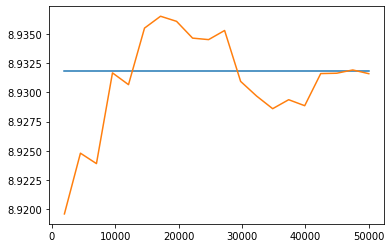

In [43]:
plt.plot(numSteps, values);
plt.plot(numSteps, values_mc);

If the option is all European then we get a flat line. If not, we use the binomial tree and get the price to 4 significant figures with 2000 steps.

## Risk Sensitivities

The analytical model produced the following sensitivities

In [45]:
chooserOption.delta(valueDate, stockPrice, discountCurve, dividendYield, model)

-0.7665880273322045

In [46]:
chooserOption.gamma(valueDate, stockPrice, discountCurve, dividendYield, model)

0.0564448043860466

In [47]:
chooserOption.theta(valueDate, stockPrice, discountCurve, dividendYield, model)

-0.0023917243021036256

In [48]:
chooserOption.vega(valueDate, stockPrice, discountCurve, dividendYield, model)

11.116256122321033

In [49]:
chooserOption.rho(valueDate, stockPrice, discountCurve, dividendYield, model)

-23.80671783683397

Copyright (c) 2020 Dominic O'Kane